In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [7]:
K=tf.keras

In [8]:
data=pd.read_csv('voice.csv')

## Data Exploration

In [10]:
male_data=data[data['label']=='male']
female_data=data[data['label']=='female']

<BarContainer object of 1 artists>

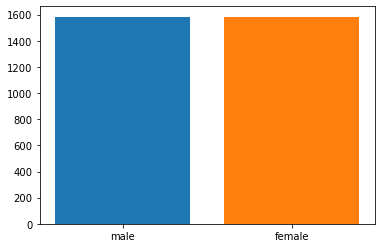

In [17]:
# distribution of labels
plt.bar("male",len(male_data))
plt.bar("female",len(female_data))

Text(0, 0.5, 'Mean frequency in Khz')

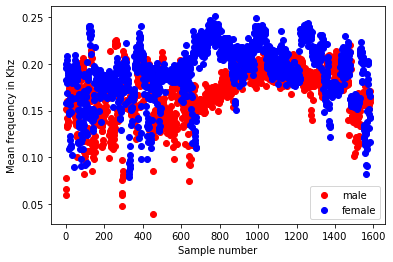

In [39]:
# mean frequency of both genders
plt.scatter(range(len(male_data)),male_data.meanfreq,color='red')
plt.scatter(range(len(female_data)),female_data.meanfreq,color='blue')
plt.legend(("male","female"))
plt.xlabel("Sample number")
plt.ylabel("Mean frequency in Khz")


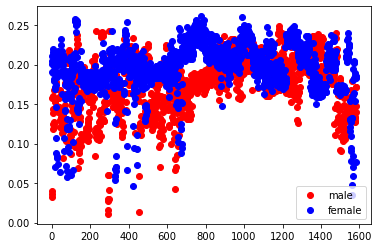

In [25]:
# median frequency of both genders

plt.scatter(range(len(male_data)),male_data["median"],color='red')
plt.scatter(range(len(female_data)),female_data["median"],color='blue')
plt.legend(("male","female"))

Text(0, 0.5, 'Q25 in Khz')

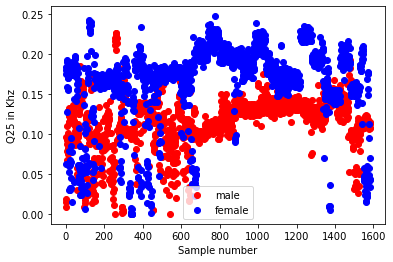

In [40]:
# Q25 frequecy frequency of both genders

plt.scatter(range(len(male_data)),male_data["Q25"],color='red')
plt.scatter(range(len(female_data)),female_data["Q25"],color='blue')
plt.legend(("male","female"))
plt.xlabel("Sample number")
plt.ylabel("Q25 in Khz")


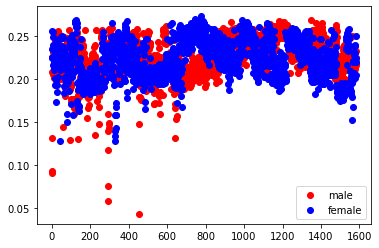

In [29]:
# Q75 frequecy frequency of both genders

plt.scatter(range(len(male_data)),male_data["Q75"],color='red')
plt.scatter(range(len(female_data)),female_data["Q75"],color='blue')
plt.legend(("male","female"))

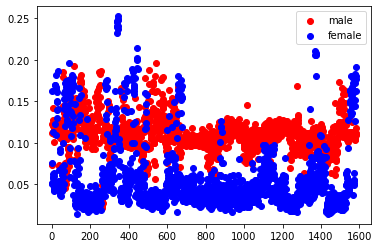

In [30]:
# IQR frequecy frequency of both genders

plt.scatter(range(len(male_data)),male_data["IQR"],color='red')
plt.scatter(range(len(female_data)),female_data["IQR"],color='blue')
plt.legend(("male","female"))

Text(0, 0.5, 'Mean Fundamental Freq')

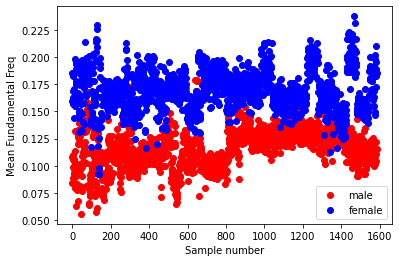

In [41]:
# Max fundamental frequecy frequency of both genders

plt.scatter(range(len(male_data)),male_data["meanfun"],color='red')
plt.scatter(range(len(female_data)),female_data["meanfun"],color='blue')
plt.legend(("male","female"))
plt.xlabel("Sample number")
plt.ylabel("Mean Fundamental Freq")

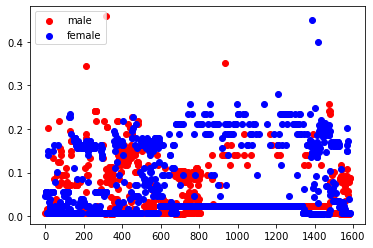

In [36]:
# Max fundamental frequecy frequency of both genders

plt.scatter(range(len(male_data)),male_data["mindom"],color='red')
plt.scatter(range(len(female_data)),female_data["mindom"],color='blue')
plt.legend(("male","female"))

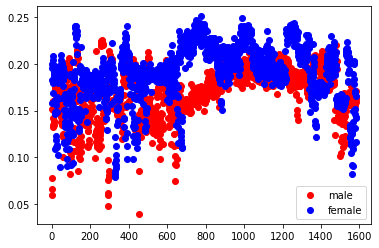

In [38]:
# Centroid frequecy frequency of both genders

plt.scatter(range(len(male_data)),male_data["centroid"],color='red')
plt.scatter(range(len(female_data)),female_data["centroid"],color='blue')
plt.legend(("male","female"))

In [22]:
male_data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0.155565,0.059072,0.127465,0.110698,0.214884,0.104186,3.447731,19.470467,0.912684,0.454094,...,0.155565,0.121602,0.040816,0.263158,0.451050,0.004883,0.795898,0.791016,0.437586,male
1580,0.164135,0.060230,0.171909,0.108091,0.219123,0.111032,2.954296,14.333682,0.901312,0.385642,...,0.164135,0.104192,0.013369,0.222222,0.429145,0.004883,0.795898,0.791016,0.554321,male
1581,0.170778,0.063865,0.171791,0.114757,0.232615,0.117858,2.360729,10.014721,0.914712,0.425689,...,0.170778,0.115603,0.044053,0.256410,0.467187,0.078125,0.795898,0.717773,0.602527,male
1582,0.162350,0.060335,0.140085,0.112611,0.224204,0.111593,3.506742,20.298964,0.907180,0.412580,...,0.162350,0.110352,0.019231,0.270270,0.420532,0.087891,0.771484,0.683594,0.600000,male


## Preprocessing: onehot encoding

In [4]:
data['Label']=pd.get_dummies(data.label)['male']

In [5]:
data.drop(['label'],inplace=True,axis=1)

In [13]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'Label'],
      dtype='object')

In [26]:
X,y=data[data.columns[:-1]].values.astype(np.float32),data['Label'].values.astype(np.float32)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#### Seperate data into training and validation set

In [ ]:
X,y=shuffle(X,y)

In [35]:
X_tr,X_t, y_tr,y_t=train_test_split(X,y,test_size=0.2)

## Build the Keras model

In [56]:
model=K.models.Sequential()
model.add(K.layers.Dense(100,activation='relu',input_shape=(X_tr.shape[1],)))
model.add(K.layers.Dense(50,activation='relu',))
model.add(K.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')


In [57]:
H=model.fit(X_tr,y_tr,validation_data=(X_t,y_t),batch_size=32,epochs=130)

Epoch 1/130
80/80 [==============================] - 0s 6ms/step - loss: 0.8295 - accuracy: 0.5406 - val_loss: 0.7104 - val_accuracy: 0.5237
Epoch 2/130
80/80 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.6567 - val_loss: 0.7817 - val_accuracy: 0.6577
Epoch 3/130
80/80 [==============================] - 0s 3ms/step - loss: 0.7926 - accuracy: 0.6705 - val_loss: 0.6756 - val_accuracy: 0.6719
Epoch 4/130
80/80 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.6993 - val_loss: 0.5995 - val_accuracy: 0.7240
Epoch 5/130
80/80 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7301 - val_loss: 0.7221 - val_accuracy: 0.7634
Epoch 6/130
80/80 [==============================] - 0s 3ms/step - loss: 0.6015 - accuracy: 0.7380 - val_loss: 0.6536 - val_accuracy: 0.7603
Epoch 7/130
80/80 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.7391 - val_loss: 0.5517 - val_accuracy: 0.7744
Epoch 8/130
8

In [58]:
import matplotlib.pyplot as plt

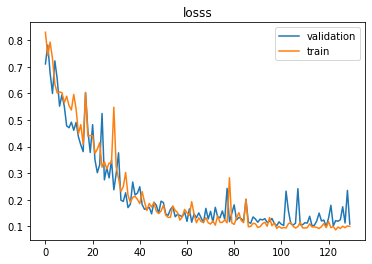

In [60]:
plt.plot(H.history['val_loss'])
plt.plot(H.history['loss'])
plt.legend(('validation','train'))
plt.title('losss')
plt.show()

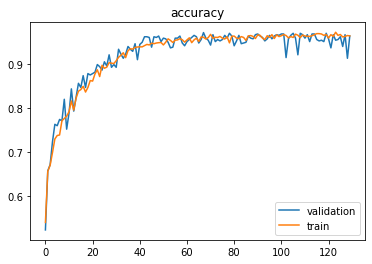

In [61]:
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['accuracy'])
plt.legend(('validation','train'))
plt.title('accuracy')
plt.show()

In [62]:
#save model
K.models.save_model(model,'model.h5')

In [76]:
# sample test 1
data_male=pd.read_csv('Brian-Acoustics.csv')

In [79]:
data_male.drop(['sound.files','Unnamed: 0'],inplace=True,axis=1)

In [85]:
X=data_male[data.columns[:-1]]

In [88]:
X=X.values

In [89]:
model.predict(X)

array([[0.93032044]], dtype=float32)

In [90]:
# sample test2
data_female=pd.read_csv('Amy-Acoustics.csv')
data_female.drop(['sound.files','Unnamed: 0'],inplace=True,axis=1)

In [91]:
X2=data_female[data.columns[:-1]].values

In [92]:
model.predict(X2)

array([[0.07959977]], dtype=float32)